# **EMAIL SPAM DETECTION 📧**

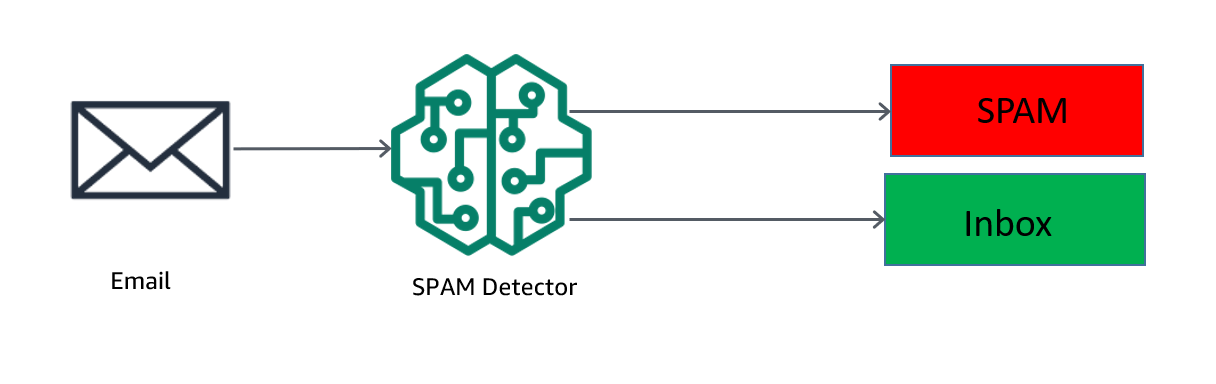

## Data Exploration


In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Downloading the stopwords dataset
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fatim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Loading the dataset
df = pd.read_csv("email.csv",encoding='latin-1')

In [4]:
# Shape of the dataset
df.shape

(5572, 5)

In [5]:
# Displaying first few rows of the dataset
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
# Describing the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# Removing unnecessary columns
columns_to_drop = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]
df.drop(columns=columns_to_drop, inplace=True)

In [8]:
# Columns present in dataset now
df.columns

Index(['v1', 'v2'], dtype='object')

In [9]:
# Checking number of missing values
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [10]:
# Renaming columns using dictionary
new_cols = {'v1': 'Category',
            'v2': 'Message'}
df.rename(columns=new_cols, inplace=True)

In [11]:
# Displaying first few rows again
df.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


## Data Visualization

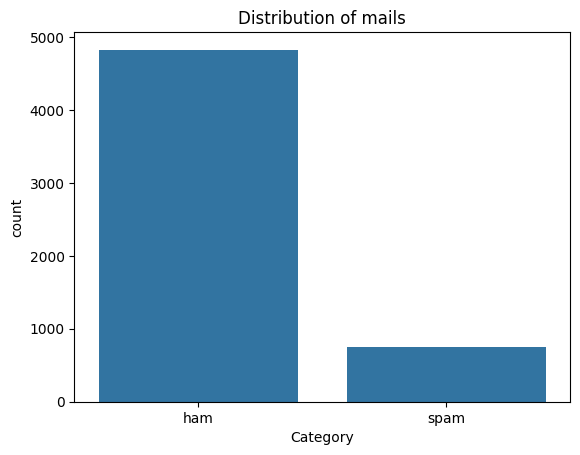

In [12]:
# Countplot for distribution of mails as "spam" and "ham"
sns.countplot(data=df, x='Category')
plt.xlabel('Category')
plt.ylabel('count')
plt.title('Distribution of mails')
plt.show()

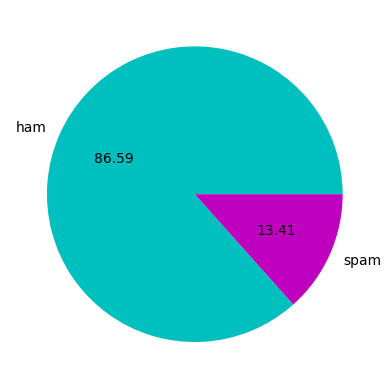

In [13]:
# Pie Plot for distribution of mails as "spam" and "ham"
plt.pie(df['Category'].value_counts(), labels=['ham','spam'], colors = ['c','m'], autopct='%0.2f')
plt.show()

In [14]:
# Encoding the labels "spam" and "ham" as 0 annd 1 respectively
df.loc[df["Category"] == "spam", "Category"] = 0
df.loc[df["Category"] == "ham", "Category"] = 1

In [15]:
# Visualizing word cloud for spam and ham separately

from wordcloud import WordCloud

spam_email = ' '.join(df[df['Category'] == 0]['Message'])
ham_email = ' '.join(df[df['Category'] == 1]['Message'])

wordcloud_spam = WordCloud(width=1000, height=800, background_color="white").generate(spam_email)
wordcloud_ham = WordCloud(width=1000, height=800, background_color="white").generate(ham_email)

plt.figure(figsize = (12,8))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.title("Spam Cloud")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.title("Ham Cloud")

plt.show()



ModuleNotFoundError: No module named 'wordcloud'

## Splitting the Dataset

In [ ]:
# Separate the feature (message) and target (category) data
X = df["Message"]
Y = df["Category"]

In [ ]:
# Displaying the messages
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [ ]:
# Displaying the messages
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

In [ ]:
# Print the shapes of all datasets
print('X Train shape: ', X_train.shape)
print('Y Train shape: ', Y_train.shape)
print('X Test shape: ', X_test.shape)
print('Y Test shape: ', Y_test.shape)

X Train shape:  (4457,)
Y Train shape:  (4457,)
X Test shape:  (1115,)
Y Test shape:  (1115,)


## Feature Extraction (TF-IDF Vectorization)

In [ ]:
# Initialize TF-IDF Vectorizer
feature_extraction = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)

In [ ]:
# Feature extraction for training and testing data
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

In [ ]:
# Convert Y_train and Y_test to integer type
Y_train = Y_train.astype("int")
Y_test = Y_test.astype("int")

## Model Training

Since the outcome is binary, we use Logistic Regression

In [ ]:
# Creating and Fit Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_features, Y_train)

LogisticRegression()

In [ ]:
# Make predictions on the training data
predict_train_data=model.predict(X_train_features)

In [ ]:
# Make predictions on the testing data
predict_test_data=model.predict(X_test_features)

## Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
# Model Evaluation (Training Data)
accuracy_train_data=accuracy_score(Y_train,predict_train_data)
print("Accuracy on training data: ",accuracy_train_data)

Accuracy on training data:  0.9661207089970832


In [ ]:
# Model Evaluation (Test Data)
accuracy_test_data=accuracy_score(Y_test,predict_test_data)
print("Acuuracy on test data: ",accuracy_test_data)

Acuuracy on test data:  0.9623318385650225


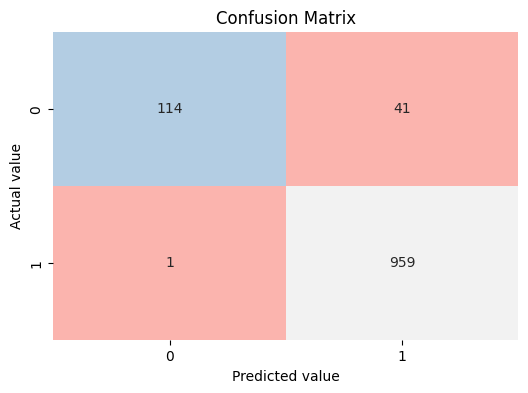

In [ ]:
conf_matrix=confusion_matrix(Y_test,predict_test_data)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Pastel1",cbar=False)
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Confusion Matrix")
plt.show()

## Model Testing

In [ ]:
sample_emails = [
    "Congratulations on your recent achievement! Well done.",
    "Claim your prize now! You've won $1,000,000!",
    "Meeting agenda for next week's project review attached.",
    "Urgent! Claim your coupons now!",
    "Thank you for your order. Your package is on its way.",
    "Call now and get a special discount!"
]

for email in sample_emails:
    new_data_features = feature_extraction.transform([email])
    prediction = model.predict(new_data_features)

    if prediction[0] == 1:
        print(f"'{email}' \n is not a Spam Mail.\n")
    else:
        print(f"'{email}' \n is a Spam Mail.\n")

'Congratulations on your recent achievement! Well done.' 
 is not a Spam Mail.

'Claim your prize now! You've won $1,000,000!' 
 is a Spam Mail.

'Meeting agenda for next week's project review attached.' 
 is not a Spam Mail.

'Urgent! Claim your coupons now!' 
 is a Spam Mail.

'Thank you for your order. Your package is on its way.' 
 is not a Spam Mail.

'Call now and get a special discount!' 
 is not a Spam Mail.



## Conclusion

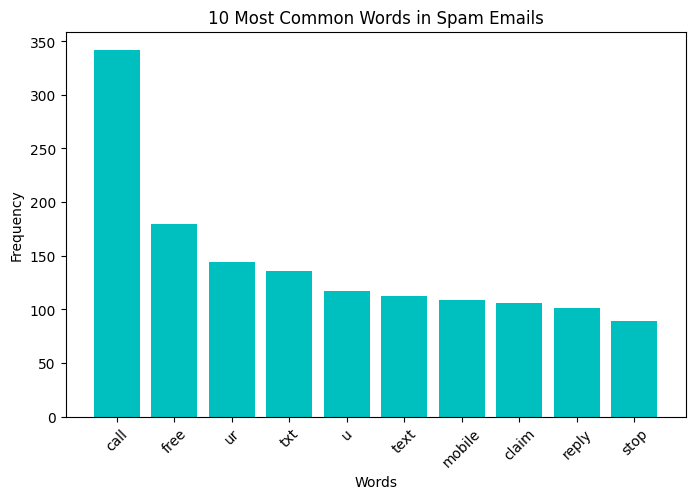

In [ ]:
# Top 7 Most Common Words in Spam Emails

stop_words = set(stopwords.words('english'))
spam_words = " ".join(df[df['Category'] == 0]['Message']).split()
ham_words = " ".join(df[df['Category'] == 1]['Message']).split()

spam_word_freq = Counter([word.lower() for word in spam_words if word.lower() not in stop_words and word.isalpha()])

plt.figure(figsize=(8, 5))
plt.bar(*zip(*spam_word_freq.most_common(10)), color='c')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('10 Most Common Words in Spam Emails')
plt.xticks(rotation=45)
plt.show()